# Análisis de datos Libreria Kawamart
Ejercicio de Análisis de Datos: Consultoría para la empresa y librería Kawamart, donde se definen objetivos estratégicos, análisis de datos, mapa estratégico y diseño de indicadores para cumplimiento de metas, muestra de los indicadores y dashboards diseñados. 

# Contexto de la empresa
Kawamart es una empresa especializada en libros, enseres y productos de oficina que vende en línea a personas y empresas. La empresa actualmente se encuentra posicionada a nivel mundial y su rápida expansión en los últimos años ha generado vacíos de control y sus directivos no se han detenido a estudiar nuevas estrategias para la compañía. Actualmente la compañía tiene presencia en toda Latinoamérica y el Caribe, para lo cual manejan cuatro gerentes regionales de las zonas Caribe, Centro, Norte y Sur.

# 
Debido a la cantidad de información que se registra en el Enterprise Resource Planning (ERP), los gerentes regionales deben realizar reportes periódicos que les implican tiempo de operación en otras actividades críticas de la empresa, es por lo que necesitan desarrollar los indicadores conectados en vivo a su ERP y el diseño de dashboards con los datos relevantes para cada gerente (cada gerente solo quiere conocer la información de su zona).

#
La empresa cuenta con SAP y se nos entrega una extracción de información de los últimos años con sus ventas donde se incluyen el precio de venta (en pesos colombianos), % descuento y ganancia de cada una de sus operaciones con todo el detalle relevante: país, ciudad, cliente, categoría de producto, subcategorías, fechas de envío, entre otros campos. Con base en esta información debemos ayudar en el proceso de entendimiento de los indicadores que son relevantes para la empresa, por lo que nuestra primera función es definir los 
objetivos estratégicos a los que la empresa debe apuntar.

# La gerencia de Kawamart definió el siguiente esquema de entregas:
1. Definición de objetivos estratégicos y análisis de datos para dentro de 3 semanas, mediante un resumen ejecutivo.
2. Mapa estratégico y diseño de indicadores con las metas para dentro de 5 semanas.
3. Entrega/muestra de los indicadores y dashboards diseñados para las 4 gerencias sobre Power BI.

# Identificación del Problema:
Una falta en la cultura de análisis de datos, estrategías regionales bien definidas y procesos eficientes para gestión de datos.

# Objetivos
1. Implementar un sistema de análisis de datos que le permita a la empresa tomar y desarrollar decisiones estrategicas, basadas en la información suministrada.
2. Desarrollar un mapa estratégico con indicadores que sean relevantes para cada región, que facilite la toma de decisiones y el seguimiento del desempeño.
3. Automatizar los procesos manuales para la gestión de datos, liberando tiempo valioso para que los gerentes se concentren en actividades estratégicas.

# Datos proporcionados
1. Compras: Base de datos con la información correspondiente a las ventas que se han realizado, con información del cliente , referencia del producto, región y ciudad de venta, categoría del producto, costo del producto y ganancia del producto, entre otros datos relevantes.
2. Devoluciones: información correspondiente a las ordenes que presentaron devolución.
3. Gerentes: Información del nombre del gerente y de que región esta a cargo. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import folium

In [2]:
compras = pd.read_csv("Compras.csv")
devoluciones = pd.read_csv("Devoluciones.csv")
gerentes = pd.read_csv("Personas.csv")

In [3]:
compras.head()

,Id. de la fila,Id. del pedido,Fecha del pedido,Fecha de envío,Forma de envío,Id. del cliente,Nombre del cliente,Segmento,Ciudad,Estado,País,Región,Id. del producto,Categoría,Subcategoría,Nombre del producto,Total ($ COP),Cantidad,Descuento,Ganancia ($ COP)
0,1,MX-2015-143658,42645,42649,Estándar,RC-20575,Reyes Coto,Cliente,Ciudad de México,Distrito Federal,México,Norte,MAT-ET-10000866,Material de oficina,Etiquetas,"Hon Etiquetas para carpetas de archivos, Ajust...",2223.6,3,0.0,775.2
1,2,MX-2013-155047,41928,41933,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,Colombia,Sur,MOB-MO-10000543,Mobiliario,Mobiliario,"Tenex Reloj, Duradero",42867.2,8,0.0,15422.4
2,3,MX-2013-155047,41928,41933,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,Colombia,Sur,MOB-LI-10000111,Mobiliario,Librerías,"Ikea Vitrina, Blanco",32857.6,2,0.0,9193.6
3,4,MX-2013-155047,41928,41933,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,Colombia,Sur,MAT-CA-10004211,Material de oficina,Carpetas,"Cardinal Carpeta, Transparente",6024.8,4,0.0,843.2
4,5,MX-2013-155047,41928,41933,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,Colombia,Sur,MAT-AR-10001135,Material de oficina,Arte,"Sanford Lienzos, Tamaños variados",12172.0,2,0.0,1944.8


Arreglamos los valores de "Fechas de envío" y "Fecha del pedido", ya que se encontraba en formato número.

In [4]:
compras['Fecha de envío'] = pd.to_datetime(compras['Fecha de envío'], origin='1899-12-30', unit='D')

compras['Fecha del pedido'] = pd.to_datetime(compras['Fecha del pedido'], origin='1899-12-30', unit='D')

compras.head()

,Id. de la fila,Id. del pedido,Fecha del pedido,Fecha de envío,Forma de envío,Id. del cliente,Nombre del cliente,Segmento,Ciudad,Estado,País,Región,Id. del producto,Categoría,Subcategoría,Nombre del producto,Total ($ COP),Cantidad,Descuento,Ganancia ($ COP)
0,1,MX-2015-143658,2016-10-02,2016-10-06,Estándar,RC-20575,Reyes Coto,Cliente,Ciudad de México,Distrito Federal,México,Norte,MAT-ET-10000866,Material de oficina,Etiquetas,"Hon Etiquetas para carpetas de archivos, Ajust...",2223.6,3,0.0,775.2
1,2,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,Colombia,Sur,MOB-MO-10000543,Mobiliario,Mobiliario,"Tenex Reloj, Duradero",42867.2,8,0.0,15422.4
2,3,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,Colombia,Sur,MOB-LI-10000111,Mobiliario,Librerías,"Ikea Vitrina, Blanco",32857.6,2,0.0,9193.6
3,4,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,Colombia,Sur,MAT-CA-10004211,Material de oficina,Carpetas,"Cardinal Carpeta, Transparente",6024.8,4,0.0,843.2
4,5,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,Colombia,Sur,MAT-AR-10001135,Material de oficina,Arte,"Sanford Lienzos, Tamaños variados",12172.0,2,0.0,1944.8


Vamos a crear una nueva columna para verificar por año diferentes factores.

In [5]:
compras['Año'] = compras['Fecha del pedido'].dt.year

compras.head()

,Id. de la fila,Id. del pedido,Fecha del pedido,Fecha de envío,Forma de envío,Id. del cliente,Nombre del cliente,Segmento,Ciudad,Estado,...,Región,Id. del producto,Categoría,Subcategoría,Nombre del producto,Total ($ COP),Cantidad,Descuento,Ganancia ($ COP),Año
0,1,MX-2015-143658,2016-10-02,2016-10-06,Estándar,RC-20575,Reyes Coto,Cliente,Ciudad de México,Distrito Federal,...,Norte,MAT-ET-10000866,Material de oficina,Etiquetas,"Hon Etiquetas para carpetas de archivos, Ajust...",2223.6,3,0.0,775.2,2016
1,2,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,Sur,MOB-MO-10000543,Mobiliario,Mobiliario,"Tenex Reloj, Duradero",42867.2,8,0.0,15422.4,2014
2,3,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,Sur,MOB-LI-10000111,Mobiliario,Librerías,"Ikea Vitrina, Blanco",32857.6,2,0.0,9193.6,2014
3,4,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,Sur,MAT-CA-10004211,Material de oficina,Carpetas,"Cardinal Carpeta, Transparente",6024.8,4,0.0,843.2,2014
4,5,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,Sur,MAT-AR-10001135,Material de oficina,Arte,"Sanford Lienzos, Tamaños variados",12172.0,2,0.0,1944.8,2014


### 1. ¿Cuál es la cantidad de pedidos que han hecho por año?

In [6]:
compras['Año'].value_counts(ascending=False)

Año
2016    3330
2015    3069
2014    2176
2013    1713
Name: count, dtype: int64

<b>RTA//</b> Como se puede apreciar, la cantidad de pedidos ha crecido año tras año. 

### 2. ¿Cómo van las ventas de la compañia en los últimos años? 

Para poder contestar esta pregunta, es importante saber cuales fueron las ventas efectivas (que no tuvieron devolución) para poder dar una respuesta mas precisa. Por tal razón debemos hacer una unión entre la base de datos de "Compras" y "Devoluciones"

In [7]:
devoluciones.head()

,Id. del pedido,Devuelto
0,MX-2014-101077,Sí
1,MX-2013-154179,Sí
2,MX-2014-112956,Sí
3,US-2015-104010,Sí
4,US-2015-152744,Sí


In [8]:
compras = pd.merge(compras, devoluciones, how='left', left_on='Id. del pedido', right_on='Id. del pedido')

compras.head()

,Id. de la fila,Id. del pedido,Fecha del pedido,Fecha de envío,Forma de envío,Id. del cliente,Nombre del cliente,Segmento,Ciudad,Estado,...,Id. del producto,Categoría,Subcategoría,Nombre del producto,Total ($ COP),Cantidad,Descuento,Ganancia ($ COP),Año,Devuelto
0,1,MX-2015-143658,2016-10-02,2016-10-06,Estándar,RC-20575,Reyes Coto,Cliente,Ciudad de México,Distrito Federal,...,MAT-ET-10000866,Material de oficina,Etiquetas,"Hon Etiquetas para carpetas de archivos, Ajust...",2223.6,3,0.0,775.2,2016,NaN
1,2,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,MOB-MO-10000543,Mobiliario,Mobiliario,"Tenex Reloj, Duradero",42867.2,8,0.0,15422.4,2014,NaN
2,3,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,MOB-LI-10000111,Mobiliario,Librerías,"Ikea Vitrina, Blanco",32857.6,2,0.0,9193.6,2014,NaN
3,4,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,MAT-CA-10004211,Material de oficina,Carpetas,"Cardinal Carpeta, Transparente",6024.8,4,0.0,843.2,2014,NaN
4,5,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,MAT-AR-10001135,Material de oficina,Arte,"Sanford Lienzos, Tamaños variados",12172.0,2,0.0,1944.8,2014,NaN


Es importante que para que no hagan ruido los datos, eliminemos los valores NaN en la columna "Devuelto" y lo cambiemos por el valor "No"

In [9]:
compras['Devuelto'] = compras['Devuelto'].fillna('No')

compras.head()

,Id. de la fila,Id. del pedido,Fecha del pedido,Fecha de envío,Forma de envío,Id. del cliente,Nombre del cliente,Segmento,Ciudad,Estado,...,Id. del producto,Categoría,Subcategoría,Nombre del producto,Total ($ COP),Cantidad,Descuento,Ganancia ($ COP),Año,Devuelto
0,1,MX-2015-143658,2016-10-02,2016-10-06,Estándar,RC-20575,Reyes Coto,Cliente,Ciudad de México,Distrito Federal,...,MAT-ET-10000866,Material de oficina,Etiquetas,"Hon Etiquetas para carpetas de archivos, Ajust...",2223.6,3,0.0,775.2,2016,No
1,2,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,MOB-MO-10000543,Mobiliario,Mobiliario,"Tenex Reloj, Duradero",42867.2,8,0.0,15422.4,2014,No
2,3,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,MOB-LI-10000111,Mobiliario,Librerías,"Ikea Vitrina, Blanco",32857.6,2,0.0,9193.6,2014,No
3,4,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,MAT-CA-10004211,Material de oficina,Carpetas,"Cardinal Carpeta, Transparente",6024.8,4,0.0,843.2,2014,No
4,5,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,MAT-AR-10001135,Material de oficina,Arte,"Sanford Lienzos, Tamaños variados",12172.0,2,0.0,1944.8,2014,No


Podemos aprovechar y cruzar la base de datos de los gerente, para saber según la región a nombre de quién esta a cargo.

In [10]:
gerentes.head()

,Región,Gerente regional
0,Caribe,Camilo Diaz
1,Centro,Silvia Machado
2,Norte,Jorge Jaimes
3,Sur,Ricardo Bustamante


In [11]:
compras = pd.merge(compras, gerentes, how='left', left_on='Región', right_on='Región')

compras.head()

,Id. de la fila,Id. del pedido,Fecha del pedido,Fecha de envío,Forma de envío,Id. del cliente,Nombre del cliente,Segmento,Ciudad,Estado,...,Categoría,Subcategoría,Nombre del producto,Total ($ COP),Cantidad,Descuento,Ganancia ($ COP),Año,Devuelto,Gerente regional
0,1,MX-2015-143658,2016-10-02,2016-10-06,Estándar,RC-20575,Reyes Coto,Cliente,Ciudad de México,Distrito Federal,...,Material de oficina,Etiquetas,"Hon Etiquetas para carpetas de archivos, Ajust...",2223.6,3,0.0,775.2,2016,No,Jorge Jaimes
1,2,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,Mobiliario,Mobiliario,"Tenex Reloj, Duradero",42867.2,8,0.0,15422.4,2014,No,Ricardo Bustamante
2,3,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,Mobiliario,Librerías,"Ikea Vitrina, Blanco",32857.6,2,0.0,9193.6,2014,No,Ricardo Bustamante
3,4,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,Material de oficina,Carpetas,"Cardinal Carpeta, Transparente",6024.8,4,0.0,843.2,2014,No,Ricardo Bustamante
4,5,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,Material de oficina,Arte,"Sanford Lienzos, Tamaños variados",12172.0,2,0.0,1944.8,2014,No,Ricardo Bustamante


Para aquella ventas que fueron devueltas es necesario que registremos una nueva ganancia ajustada con el valor de $0, para poder dar respuesta de como van las ventas, de una manera más real.

In [12]:
compras['Ganancia Ajustada'] = np.where(compras['Devuelto'] == 'Sí', 0, compras['Ganancia ($ COP)'])

compras.head(15)

,Id. de la fila,Id. del pedido,Fecha del pedido,Fecha de envío,Forma de envío,Id. del cliente,Nombre del cliente,Segmento,Ciudad,Estado,...,Subcategoría,Nombre del producto,Total ($ COP),Cantidad,Descuento,Ganancia ($ COP),Año,Devuelto,Gerente regional,Ganancia Ajustada
0,1,MX-2015-143658,2016-10-02,2016-10-06,Estándar,RC-20575,Reyes Coto,Cliente,Ciudad de México,Distrito Federal,...,Etiquetas,"Hon Etiquetas para carpetas de archivos, Ajust...",2223.6,3,0.0,775.2,2016,No,Jorge Jaimes,775.2
1,2,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,Mobiliario,"Tenex Reloj, Duradero",42867.2,8,0.0,15422.4,2014,No,Ricardo Bustamante,15422.4
2,3,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,Librerías,"Ikea Vitrina, Blanco",32857.6,2,0.0,9193.6,2014,No,Ricardo Bustamante,9193.6
3,4,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,Carpetas,"Cardinal Carpeta, Transparente",6024.8,4,0.0,843.2,2014,No,Ricardo Bustamante,843.2
4,5,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,Arte,"Sanford Lienzos, Tamaños variados",12172.0,2,0.0,1944.8,2014,No,Ricardo Bustamante,1944.8
5,6,MX-2013-155047,2014-10-16,2014-10-21,Estándar,IG-16570,Iván Girón,Cliente,Dos Quebradas,Risaralda,...,Sobres,"GlobeWeis Paquetes, Rojo",9540.4,2,0.0,3624.4,2014,No,Ricardo Bustamante,3624.4
6,7,MX-2014-134096,2015-09-28,2015-10-02,Estándar,CV-13000,Cristina Vázquez,Cliente,São Paulo,São Paulo,...,Sobres,"GlobeWeis Paquetes, Rojo",9540.4,2,0.0,3624.4,2015,No,Ricardo Bustamante,3624.4
7,8,MX-2014-134096,2015-09-28,2015-10-02,Estándar,CV-13000,Cristina Vázquez,Cliente,São Paulo,São Paulo,...,Máquinas,"Konica Impresora de tarjetas, Rojo",58588.8,3,0.0,28121.4,2015,No,Ricardo Bustamante,28121.4
8,9,MX-2014-134096,2015-09-28,2015-10-02,Estándar,CV-13000,Cristina Vázquez,Cliente,São Paulo,São Paulo,...,Suministros,"Elite Cúter, Industrial",16551.2,4,0.0,3304.8,2015,No,Ricardo Bustamante,3304.8
9,10,MX-2014-134096,2015-09-28,2015-10-02,Estándar,CV-13000,Cristina Vázquez,Cliente,São Paulo,São Paulo,...,Accesorios,"Enermax Router, Blanco",58058.4,2,0.0,2318.8,2015,No,Ricardo Bustamante,2318.8


Una vez calculada la ganancia ajustada podemos determinar el valor real de la ganancia que se obtuvo en cada año

In [13]:
# Configuramos el formato con el que se muestra los valores float, para solo mostrar milésimas

pd.options.display.float_format = '{:.3f}'.format

In [14]:
compras.groupby('Año')['Ganancia Ajustada'].sum()

Año
2013    5647166.270
2014    7157493.374
2015   10136478.174
2016   11940766.728
Name: Ganancia Ajustada, dtype: float64

<Axes: xlabel='Año'>

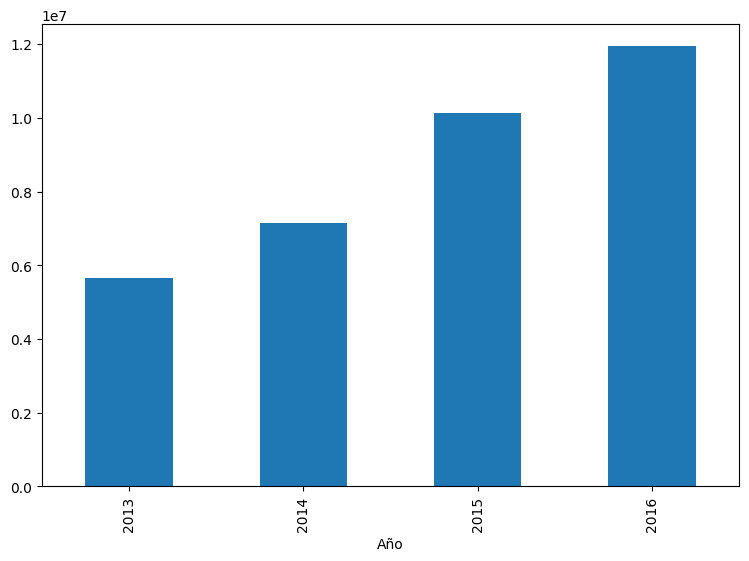

In [15]:
compras.groupby('Año')['Ganancia Ajustada'].sum().plot(kind='bar', figsize=(9,6))

<b>RTA//</b> Podemos ver que los últimos 2 años (2015 y 2016) la compañia obtuvo las ganancias más altas, debido a la pendiente positiva de la grafica podemos decir que van en ascenso las ventas y se puede según el comportamiento que para el año 2017 es probable que aumenten con respecto a las del año 2016

### 3. ¿Qué categoría y subcategoría de productos venden más?

Gracias a que creamos la nueva columna "Ganancia Ajustada", pordemos contestar con mayor facilidad la pregunta.

#### Categoría

In [16]:
compras.groupby('Categoría')['Ganancia Ajustada'].sum()

Categoría
Material de oficina   12310943.720
Mobiliario             7038631.380
Tecnología            15532329.446
Name: Ganancia Ajustada, dtype: float64

<Axes: ylabel='Ganancia Ajustada'>

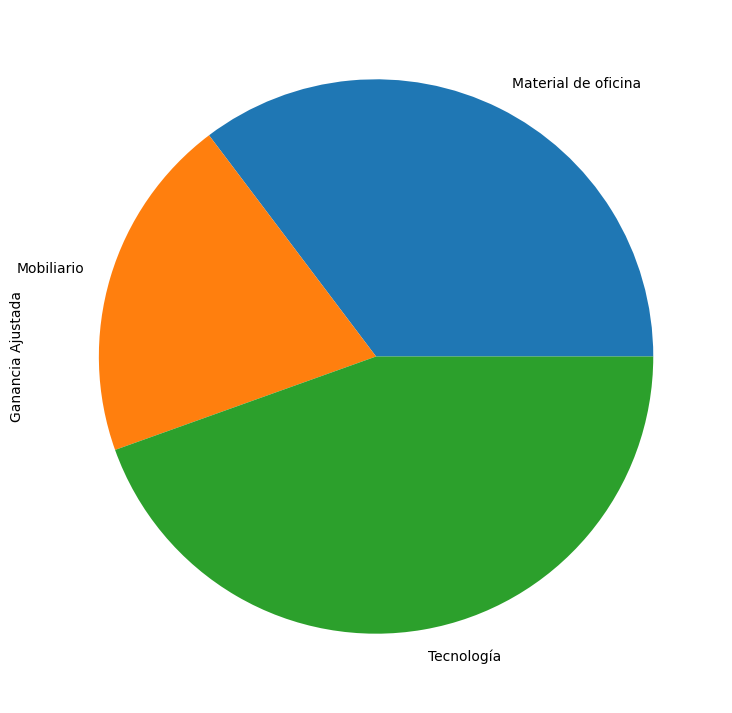

In [17]:
compras.groupby('Categoría')['Ganancia Ajustada'].sum().plot(kind='pie', figsize=(9,9))

<b>RTA1//</b> La categoría con más venta ajustada, es "Tecnología" por lo que importante que se pueda reforzar esta línea de productos.

#### Subcategoría

In [18]:
compras.groupby('Subcategoría')['Ganancia Ajustada'].sum()

Subcategoría
Accesorios           4190018.220
Almacenamiento       2383327.920
Arte                 1081334.640
Carpetas              849575.000
Copiadoras           6503184.046
Electrodomésticos    4133284.120
Etiquetas             367095.960
Grapas                375600.720
Librerías            4137668.080
Mesas               -1910050.980
Mobiliario             87615.280
Máquinas              345873.500
Papel                 959084.920
Sillas               4723399.000
Sobres                997814.320
Suministros          1163826.120
Teléfonos            4493253.680
Name: Ganancia Ajustada, dtype: float64

<Axes: xlabel='Subcategoría'>

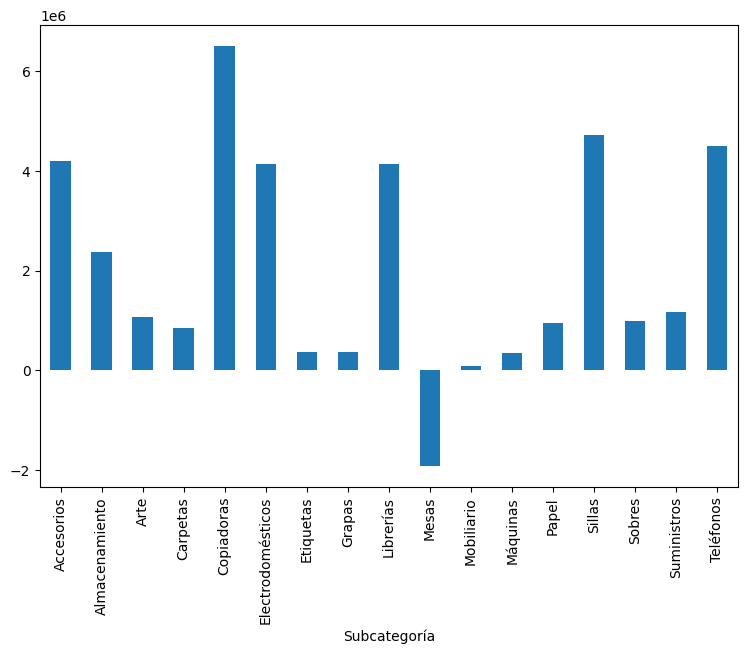

In [19]:
compras.groupby('Subcategoría')['Ganancia Ajustada'].sum().plot(kind='bar', figsize=(9,6))

<b>RTA2//</b> La subcategoría con más ventas durante los 4 años evaluados es "Copiadoras", que conincide hace parte de la categoría "Tecnología"

### 4. ¿Cuáles es la subcategoría con menor utilidad y a qué se debe esto?

In [20]:
compras.groupby('Subcategoría')['Ganancia Ajustada'].sum()

Subcategoría
Accesorios           4190018.220
Almacenamiento       2383327.920
Arte                 1081334.640
Carpetas              849575.000
Copiadoras           6503184.046
Electrodomésticos    4133284.120
Etiquetas             367095.960
Grapas                375600.720
Librerías            4137668.080
Mesas               -1910050.980
Mobiliario             87615.280
Máquinas              345873.500
Papel                 959084.920
Sillas               4723399.000
Sobres                997814.320
Suministros          1163826.120
Teléfonos            4493253.680
Name: Ganancia Ajustada, dtype: float64

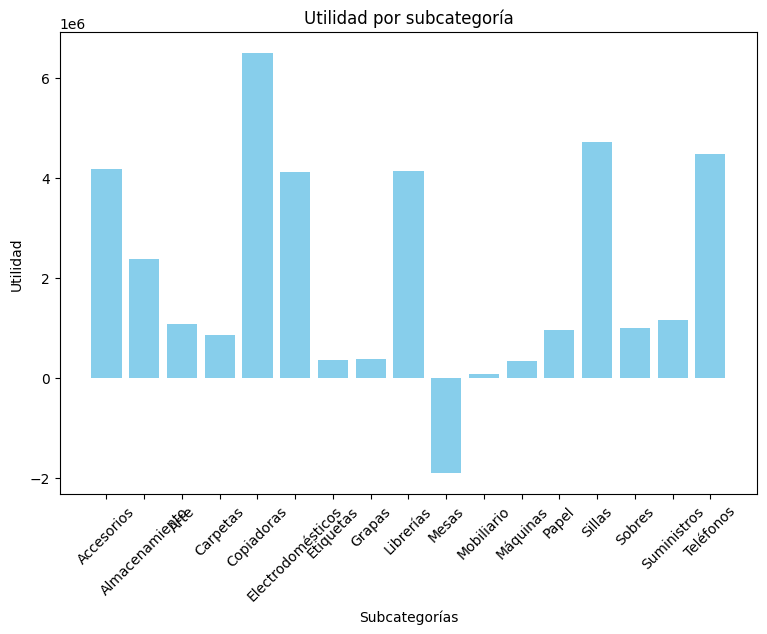

In [27]:
utilidad_subcategoria = dict(compras.groupby('Subcategoría')['Ganancia Ajustada'].sum())

plt.figure(figsize=(9,6))
plt.bar(utilidad_subcategoria.keys(), utilidad_subcategoria.values(), color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Subcategorías')
plt.ylabel('Utilidad')
plt.title('Utilidad por subcategoría')
plt.show()

<b>RTA//</b> Podemos ver un valor negativo, en la subcategoría "Mesas", y esto se debe a que dentro del calculo de ganancia se toma en cuenta el descuento que se le genero al producto, y para este caso, se hicieron descuentos más grandes que la totalización de la ganancia del producto. Por tanto se debe cuidar la cantidad de descuentos que se les dan a los clientes

### 5. ¿Cúal es el gerente con menos ganancias en las ventas ventas?

Primero haremos una visualización de los paises donde tiene presencia la empresa

In [29]:
ciudades = compras[['Ciudad', 'País']].drop_duplicates()

print(ciudades)

                 Ciudad       País
0      Ciudad de México     México
1         Dos Quebradas   Colombia
6             São Paulo     Brasil
11              Managua  Nicaragua
14             Brasília     Brasil
...                 ...        ...
10045        Ponte Nova     Brasil
10064          Registro     Brasil
10088           Camocim     Brasil
10110           Brumado     Brasil
10215          Jacobina     Brasil

[641 rows x 2 columns]


In [30]:
goelocator = Nominatim(user_agent='my_geo_locator')

In [31]:
def obtener_coordenadas(ciudad, pais):
    try:
        location = goelocator.geocode(f'{ciudad}, {pais}')
        return (location.latitude, location.longitude) if location else None
    except Exception as e:
        print(f'Error para obtener las coordenadas de {ciudad}: {e}')
        return None

In [32]:
ciudades['Coordenadas'] = ciudades.apply(lambda x: obtener_coordenadas(x['Ciudad'], x['País']), axis=1)

mapa = folium.Map(location=[0,0], zoom_start=2)

for index, row in ciudades.iterrows():
    if row['Coordenadas']:
        folium.Marker(row['Coordenadas'], popup=row['Ciudad']).add_to(mapa)

mapa.save('mapa_de_ciudades.html')

mapa

Con esto podemos ver que la empresa tiene presencia en toda latinoamerica. Cada gerente esta a cargo de una región diferente, por tanto podríamos verificarlo por región, pero como al inicio cruzamos las base de compras con la de gerentes podemos verificarlo directamente

In [33]:
compras.groupby('Gerente regional')['Ganancia Ajustada'].sum()

Gerente regional
Camilo Diaz           5864317.178
Jorge Jaimes         14780383.290
Ricardo Bustamante    4875889.558
Silvia Machado        9361314.520
Name: Ganancia Ajustada, dtype: float64

In [34]:
compras['Gerente regional'].value_counts()

Gerente regional
Ricardo Bustamante    2982
Silvia Machado        2972
Jorge Jaimes          2644
Camilo Diaz           1690
Name: count, dtype: int64

<b>RTA//</b> Podemos ver que el gerente con menos ganancias es "Ricardo Bustamante", pero tambien podemos ver que es quien más cantidad de ventas genera